# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units={units}"
                  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#bethel 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | belmonte
Processing Record 3 of Set 1 | hayma'
City not found. Skipping...
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | la sarre
Processing Record 7 of Set 1 | ngawi
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | mbuji-mayi
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | zaoyang
Processing Record 12 of Set 1 | kapa'a
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | undurkhaan
Processing Record 15 of Set 1 | dalbandin
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | vilyuchinsk
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,21.42,60,86,5.26,MG,1693303899
1,belmonte,-15.8631,-38.8828,22.26,94,99,3.20,BR,1693303899
2,grytviken,-54.2811,-36.5092,1.18,91,99,5.06,GS,1693303900
3,keflavik,64.0049,-22.5624,11.95,82,40,4.12,IS,1693303901
4,la sarre,48.8002,-79.1996,12.41,91,100,1.78,CA,1693303901


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,21.42,60,86,5.26,MG,1693303899
1,belmonte,-15.8631,-38.8828,22.26,94,99,3.20,BR,1693303899
2,grytviken,-54.2811,-36.5092,1.18,91,99,5.06,GS,1693303900
3,keflavik,64.0049,-22.5624,11.95,82,40,4.12,IS,1693303901
4,la sarre,48.8002,-79.1996,12.41,91,100,1.78,CA,1693303901


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Variable for today's date 
today = date.today() 

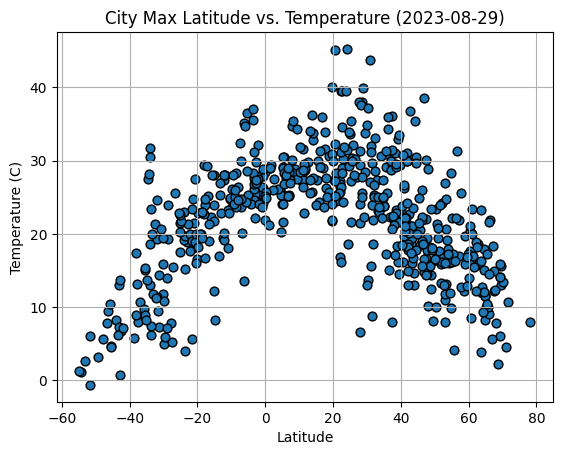

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s') 
city_data_df.plot(kind='scatter', x= 'Lat', xlabel="Latitude", y='Max Temp', ylabel ="Temperature (C)", marker = 'o', s=40, edgecolor='black',  title = f"City Max Latitude vs. Temperature ({today})", grid=True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

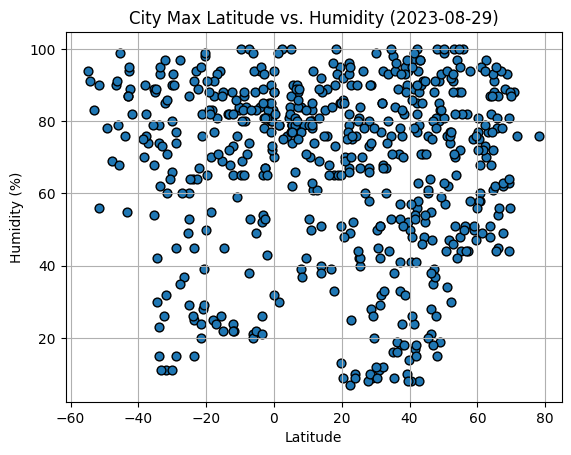

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x= 'Lat', xlabel="Latitude", y='Humidity', ylabel ="Humidity (%)", marker = 'o', s=40, edgecolor='black',  title = f"City Max Latitude vs. Humidity ({today})", grid=True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

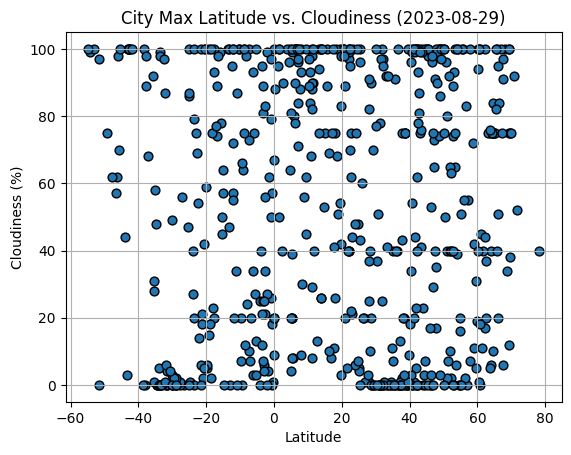

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x= 'Lat', xlabel="Latitude", y='Cloudiness', ylabel ="Cloudiness (%)", marker = 'o', s=40, edgecolor='black',  title = f"City Max Latitude vs. Cloudiness ({today})", grid=True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

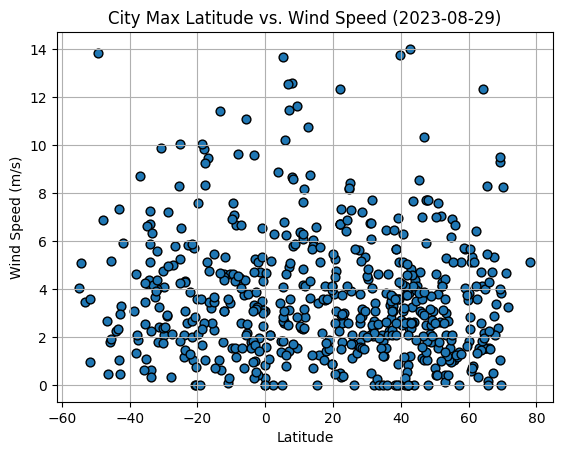

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x= 'Lat', xlabel="Latitude", y='Wind Speed', ylabel ="Wind Speed (m/s)", marker = 'o', s=40, edgecolor='black',  title = f"City Max Latitude vs. Wind Speed ({today})", grid=True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[city_data_df['Lat'] >=0,:]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,keflavik,64.0049,-22.5624,11.95,82,40,4.12,IS,2023-08-29 10:11:41
4,la sarre,48.8002,-79.1996,12.41,91,100,1.78,CA,2023-08-29 10:11:41
8,wailua homesteads,22.0669,-159.3780,26.44,82,40,6.69,US,2023-08-29 10:11:43
9,zaoyang,32.1272,112.7542,25.32,68,97,2.65,CN,2023-08-29 10:09:49
10,kapa'a,22.0752,-159.3190,27.18,79,40,6.69,US,2023-08-29 10:11:44


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,21.42,60,86,5.26,MG,2023-08-29 10:11:39
1,belmonte,-15.8631,-38.8828,22.26,94,99,3.20,BR,2023-08-29 10:11:39
2,grytviken,-54.2811,-36.5092,1.18,91,99,5.06,GS,2023-08-29 10:11:40
5,ngawi,-7.4038,111.4461,32.42,38,10,4.45,ID,2023-08-29 10:11:42
6,papatowai,-46.5619,169.4708,7.88,90,57,2.66,NZ,2023-08-29 10:11:42


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.42197738323365913


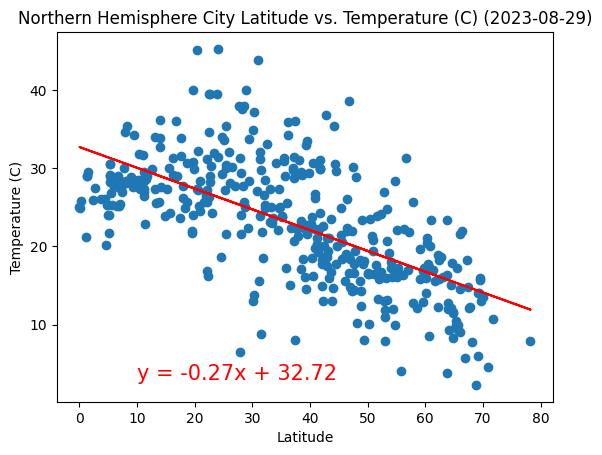

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(f'Northern Hemisphere City Latitude vs. Temperature (C) ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.6031839624224757


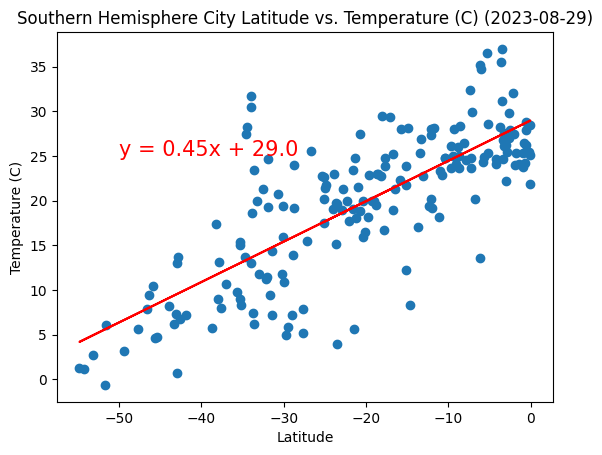

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(f'Southern Hemisphere City Latitude vs. Temperature (C) ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is relative relationship between the city latitude and the maximum temperature both in the Northern and Southern hemisphere. These plots shows that towards the equator (latitude of 0), the temperature is generally higher, therefore has generlaly a higher maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0008170088838225789


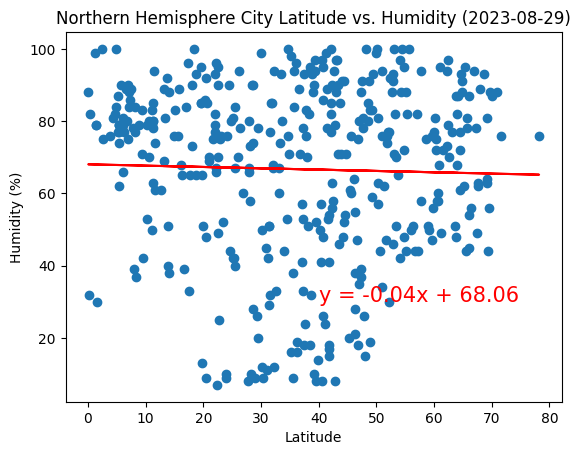

In [30]:
# Northern Hemisphere
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Humidity ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.0003969877089873703


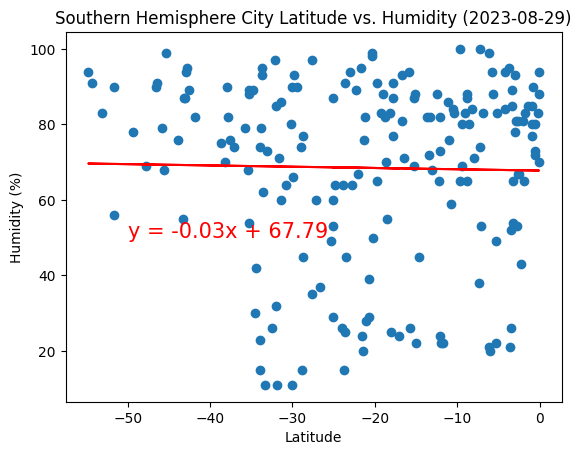

In [27]:
# Southern Hemisphere
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Humidity ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is relatively a weak relationship between the city latitude and the humidity both in the Northern and Southern hemisphere. The linear regresion model explains only a small portion of the variability in the data. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.011520503858204223


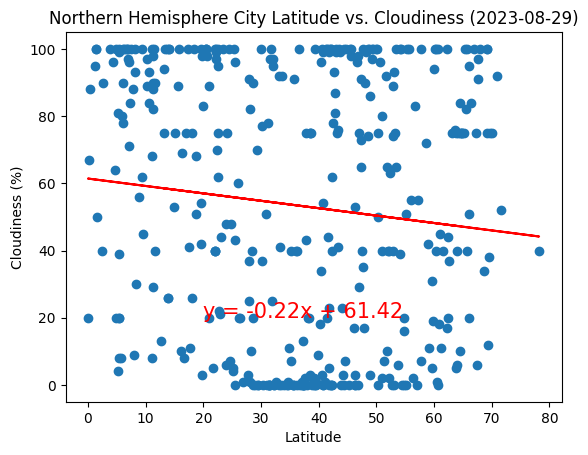

In [26]:
# Northern Hemisphere
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.0051702114350732934


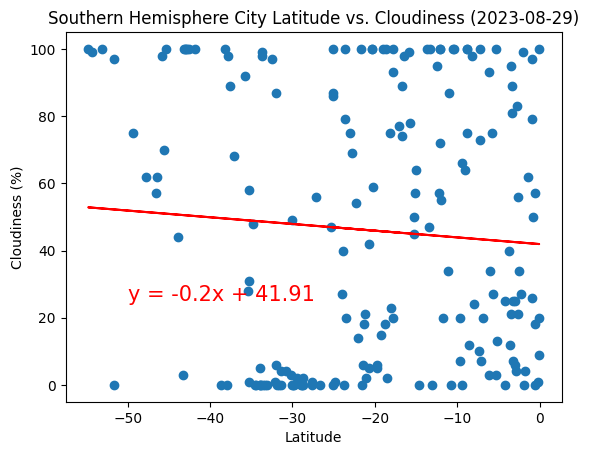

In [23]:
# Southern Hemisphere
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is relatively a weak relationship between the city latitude and the cloudiness both in the Northern and Southern hemisphere. The linear regresion model explains only a small portion of the variability in the data. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01883320607000995


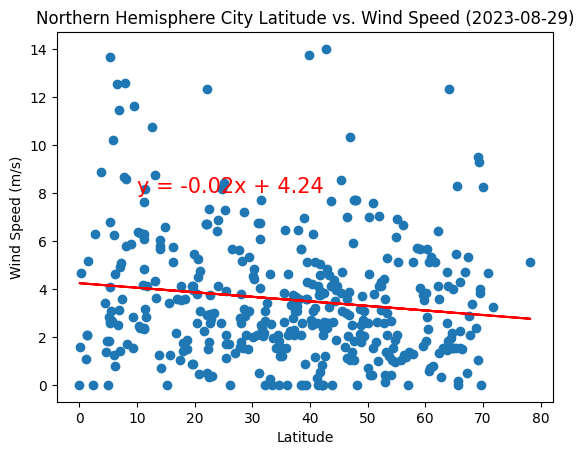

In [24]:
# Northern Hemisphere
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.004760399190879019


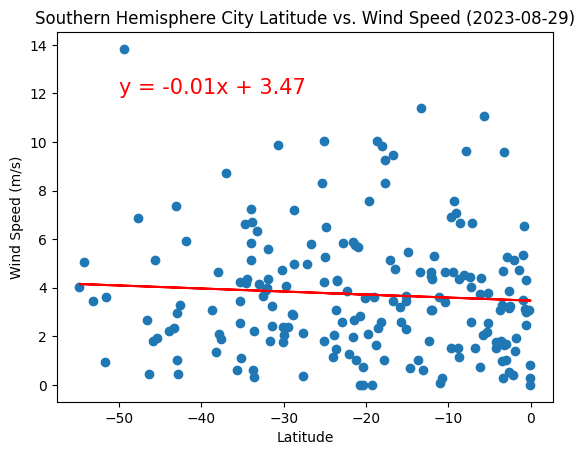

In [25]:
# Southern Hemisphere
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed ({today})')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is relatively a weak relationship between the city latitude and the wind speed in both in the Northern and Southern hemisphere. However, there seems to be a higher relationship of the wind speed and latitude of the city in the Southern Hemisphere compared to the Northern Hemisphere, which however does not exaplin much of the variability in wind speed using the latitude. 